<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Exploratory Data Analysis</strong></a></span><ul class="toc-item"><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Categorical-&amp;-Numerical-Variables" data-toc-modified-id="Categorical-&amp;-Numerical-Variables-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Categorical &amp; Numerical Variables</a></span></li><li><span><a href="#Target-Distribution" data-toc-modified-id="Target-Distribution-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Target Distribution</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Feature Engineering</strong></a></span><ul class="toc-item"><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Categorical Features</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#New-Features" data-toc-modified-id="New-Features-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>New Features</a></span></li></ul></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Model Training</strong></a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Forests</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li><li><span><a href="#Testing-Set-Predictions" data-toc-modified-id="Testing-Set-Predictions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>Testing Set Predictions</strong></a></span><ul class="toc-item"><li><span><a href="#Save-Models" data-toc-modified-id="Save-Models-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Save Models</a></span></li><li><span><a href="#Prepare-Validation-Set" data-toc-modified-id="Prepare-Validation-Set-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Prepare Validation Set</a></span></li><li><span><a href="#Predictions-on-Test-Set" data-toc-modified-id="Predictions-on-Test-Set-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Predictions on Test Set</a></span></li><li><span><a href="#Stacking" data-toc-modified-id="Stacking-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Stacking</a></span></li><li><span><a href="#SHAP" data-toc-modified-id="SHAP-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>SHAP</a></span></li></ul></li><li><span><a href="#Approche-bonus-pour-la-recherche-des-meilleures-hyperparamètres:-Optimization-bayésienne-avec-Hyperopt" data-toc-modified-id="Approche-bonus-pour-la-recherche-des-meilleures-hyperparamètres:-Optimization-bayésienne-avec-Hyperopt-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Approche bonus pour la recherche des meilleures hyperparamètres: Optimization bayésienne avec Hyperopt</strong></a></span></li></ul></div>

**HACKATHON DAUPHINE / LFIS / SESAMM**

***Groupe NERD***

**Sonia BOUDEN**

**Camille COCHENER**

**Sebastien DAVID**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as mno
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

import joblib
# import shap
import xgboost as xgb
import lightgbm as lgb

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, \
                                    StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, \
                            average_precision_score, recall_score, \
                            precision_score, f1_score, accuracy_score, \
                            mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_approximation import Nystroem
from sklearn.calibration import CalibratedClassifierCV

from category_encoders import OneHotEncoder, TargetEncoder, OrdinalEncoder

from pprint import pprint

RANDOM_STATE = 1805

In [5]:
train_data = pd.read_csv('../Data/ref_phase2_train_x.csv')
train_labels = pd.read_csv('../Data/ref_phase2_train_y.csv', header=None)
test_data = pd.read_csv('../Data/ref_phase2_valid_x.csv')

In [6]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)

(19440, 26)
(19440, 1)
(3745, 26)


# **Exploratory Data Analysis**

In [7]:
train_data = train_data.drop('raw_id', axis=1)

## Missing Values

In [8]:
train_data.isnull().sum().sort_values() / len(train_data)

sector                    0.000000
exchange                  0.000000
return_1w                 0.000051
return_1m                 0.000051
return_1y                 0.000051
realised_vol_1y           0.000103
realised_vol_1w           0.000154
realised_vol_1m           0.000154
implied_vol_3m            0.000257
delta_vol_1w              0.000514
earnings_implied_obs      0.001132
publication_date_funda    0.001389
net_income                0.001492
sales                     0.001543
net_debt                  0.001646
shareholders_equity       0.001749
cash_flow                 0.002109
ratio_put_call            0.005813
payout_ratio              0.006070
score_soc                 0.009568
score_env                 0.009568
score_gov                 0.009568
delta_vol_1y              0.014866
ebit                      0.125720
ebitda                    0.125926
dtype: float64

## Categorical & Numerical Variables

In [9]:
train_data.nunique().sort_values()

exchange                      2
sector                       20
publication_date_funda      419
score_soc                  3600
score_gov                  4698
score_env                  4937
payout_ratio               5467
earnings_implied_obs      13664
ebitda                    15573
ebit                      15575
delta_vol_1w              16240
delta_vol_1y              17241
implied_vol_3m            17276
ratio_put_call            17818
sales                     17855
cash_flow                 17859
shareholders_equity       17864
net_debt                  17866
net_income                17869
return_1w                 17951
return_1y                 17954
return_1m                 17957
realised_vol_1m           17958
realised_vol_1w           17958
realised_vol_1y           17959
dtype: int64

In [10]:
# train_data['publication_date_funda']

In [11]:
categorical_variables = ['sector']
categorical_variables_plus = ['sector']
numerical_variables = [col for col in train_data.columns if col not in categorical_variables_plus]

In [12]:
print(len(numerical_variables))
print(len(categorical_variables_plus))

24
1


## Target Distribution

In [13]:
y = train_labels.values.squeeze()

In [14]:
np.mean(y)

0.26779835390946505

# **Feature Engineering**

## Categorical Features

**One-Hot Encoding = Linear Models**

In [15]:
# %%time
# train_data_ = train_data.drop('publication_date_funda', axis=1)

# oneHotTransformer = OneHotEncoder(cols=categorical_variables)
# oneHotTransformer.fit(train_data)

# X_train_cat = oneHotTransformer.transform(train_data)
# print(X_train_cat.shape)

In [16]:
# X_train_cat['exchange'] = X_train_cat['exchange'].apply(lambda x: 1.0 if x=='US' else 0.0)

**Label Encoding = Random Forests + XGBoost + LightGBM**

In [17]:
# %%time
# labelTransformer = OrdinalEncoder(cols=categorical_variables)
# labelTransformer.fit(train_data)

# X_train_cat_label = labelTransformer.transform(train_data)
# print(X_train_cat_label.shape)

In [18]:
# X_train_cat_label['exchange'] = X_train_cat_label['exchange'].apply(lambda x: 1.0 if x=='US' else 0.0)

**Target Encoding = All Models**

https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html

In [20]:
%%time
targetEncoder = TargetEncoder(cols=categorical_variables)
targetEncoder.fit(train_data, y)

X_train_cat = targetEncoder.transform(train_data)
print(X_train_cat.shape)

(19440, 25)
Wall time: 265 ms


In [21]:
X_train_cat[categorical_variables].head()

,sector
0,0.15204
1,0.15204
2,0.15204
3,0.15204
4,0.15204


In [22]:
X_train_cat['exchange'] = X_train_cat['exchange'].apply(lambda x: 1.0 if x=='US' else 0.0)

## Missing Values

In [23]:
X_train_cat.shape

(19440, 25)

In [24]:
imputer = SimpleImputer(strategy='median')
X_train_linear = imputer.fit_transform(X_train_cat)
X_train_linear = pd.DataFrame(X_train_linear, columns=X_train_cat.columns,
                              index=X_train_cat.index)

In [25]:
X_train_linear.isnull().sum().sum()

0

## Feature Scaling

In [26]:
robustScaler = RobustScaler()
X_train_linear[numerical_variables] = \
            robustScaler.fit_transform(X_train_linear[numerical_variables])

In [27]:
scaler = StandardScaler()
X_train_linear[numerical_variables] = \
            scaler.fit_transform(X_train_linear[numerical_variables])

## Feature Selection

In [28]:
df = X_train_linear.copy()
df['target'] = y

In [29]:
label_correlation = df.corr()

In [30]:
label_correlation['target'].sort_values(ascending=False)

target                    1.000000
sector                    0.105614
realised_vol_1y           0.037391
publication_date_funda    0.022695
sales                     0.021252
implied_vol_3m            0.018780
ratio_put_call            0.016966
return_1w                 0.009534
ebitda                    0.008982
score_soc                 0.008699
score_gov                 0.007578
score_env                 0.006484
realised_vol_1m           0.006199
ebit                      0.004839
realised_vol_1w           0.001824
net_debt                 -0.001275
cash_flow                -0.002984
delta_vol_1y             -0.005813
payout_ratio             -0.006326
net_income               -0.007415
shareholders_equity      -0.011442
return_1m                -0.017491
delta_vol_1w             -0.019270
return_1y                -0.020789
exchange                 -0.020977
earnings_implied_obs     -0.030454
Name: target, dtype: float64

## New Features

In [31]:
def create_new_features(X_train_linear):
    X_train_linear['ebitda / net_debt'] = X_train_linear['ebitda'] / X_train_linear['ebitda']
    X_train_linear['ebitda / cash_flow'] = X_train_linear['ebitda'] / X_train_linear['cash_flow']
    X_train_linear['ebitda / net_income'] = X_train_linear['ebitda'] / X_train_linear['net_income']
    X_train_linear['ebitda / payout_ratio'] = X_train_linear['ebitda'] / X_train_linear['payout_ratio']
    X_train_linear['ebitda / earnings_implied_obs'] = X_train_linear['ebitda'] / X_train_linear['earnings_implied_obs']

    X_train_linear['ebit / net_debt'] = X_train_linear['ebit'] / X_train_linear['net_debt']
    X_train_linear['ebit / cash_flow'] = X_train_linear['ebit'] / X_train_linear['cash_flow']
    X_train_linear['ebit / net_income'] = X_train_linear['ebit'] / X_train_linear['net_income']
    X_train_linear['ebit / payout_ratio'] = X_train_linear['ebit'] / X_train_linear['payout_ratio']
    X_train_linear['ebit / earnings_implied_obs'] = X_train_linear['ebit'] / X_train_linear['earnings_implied_obs']

    X_train_linear['earnings_implied_obs / net_debt'] = X_train_linear['earnings_implied_obs'] / X_train_linear['net_debt']
    X_train_linear['earnings_implied_obs / cash_flow'] =  X_train_linear['earnings_implied_obs'] / X_train_linear['cash_flow']
    X_train_linear['earnings_implied_obs / net_income'] =  X_train_linear['earnings_implied_obs'] / X_train_linear['net_income']
    X_train_linear['earnings_implied_obs / payout_ratio'] =  X_train_linear['earnings_implied_obs'] / X_train_linear['payout_ratio']
    
    X_train_linear['realised_vol_1y / realised_vol_1m'] = X_train_linear['realised_vol_1y'] / X_train_linear['realised_vol_1m']
    X_train_linear['realised_vol_1y / realised_vol_1w'] = X_train_linear['realised_vol_1y'] / X_train_linear['realised_vol_1w']
    X_train_linear['realised_vol_1y / publication_date_funda'] =  X_train_linear['realised_vol_1y'] / X_train_linear['publication_date_funda']
    X_train_linear['realised_vol_1y / implied_vol_3m'] =  X_train_linear['realised_vol_1y'] / X_train_linear['implied_vol_3m']
    X_train_linear['realised_vol_1y / earnings_implied_obs'] =  X_train_linear['realised_vol_1y'] / X_train_linear['earnings_implied_obs']
    X_train_linear['realised_vol_1y / return_1y'] =  X_train_linear['realised_vol_1y'] / X_train_linear['return_1y']
    X_train_linear['realised_vol_1y / delta_vol_1y'] =  X_train_linear['realised_vol_1y'] / X_train_linear['delta_vol_1y']
    
    X_train_linear['realised_vol_1w / realised_vol_1m'] = X_train_linear['realised_vol_1w'] / X_train_linear['realised_vol_1m']
    X_train_linear['realised_vol_1w / publication_date_funda'] =  X_train_linear['realised_vol_1w'] / X_train_linear['publication_date_funda']
    X_train_linear['realised_vol_1w / implied_vol_3m'] =  X_train_linear['realised_vol_1w'] / X_train_linear['implied_vol_3m']
    X_train_linear['realised_vol_1w / earnings_implied_obs'] =  X_train_linear['realised_vol_1w'] / X_train_linear['earnings_implied_obs']
    X_train_linear['realised_vol_1w / return_1m'] =  X_train_linear['realised_vol_1w'] / X_train_linear['return_1m']
    X_train_linear['realised_vol_1w / delta_vol_1w'] =  X_train_linear['realised_vol_1w'] / X_train_linear['delta_vol_1w']
    
    X_train_linear['implied_vol_3m / realised_vol_1m'] = X_train_linear['implied_vol_3m'] / X_train_linear['realised_vol_1m']
    X_train_linear['implied_vol_3m / publication_date_funda'] =  X_train_linear['implied_vol_3m'] / X_train_linear['publication_date_funda']
    X_train_linear['implied_vol_3m / earnings_implied_obs'] =  X_train_linear['implied_vol_3m'] / X_train_linear['earnings_implied_obs']
    X_train_linear['implied_vol_3m / return_1m'] =  X_train_linear['implied_vol_3m'] / X_train_linear['return_1m']
    X_train_linear['implied_vol_3m / delta_vol_1w'] =  X_train_linear['implied_vol_3m'] / X_train_linear['delta_vol_1w']
    
    return X_train_linear

In [32]:
X_train_linear = create_new_features(X_train_linear)

# **Model Training**

In [33]:
print('Training Set :\t', X_train_linear.shape)

Training Set :	 (19440, 57)


## Logistic Regression

In [34]:
logit = LogisticRegression(penalty='l1', C=100.0, solver='liblinear',
                           class_weight='balanced', random_state=RANDOM_STATE)

In [35]:
%%time
lr_scores = cross_val_score(logit, X=X_train_linear, y=y, cv=5,
                            verbose=0, scoring='roc_auc')
print(lr_scores)

[0.59515792 0.57703999 0.59708738 0.57746918 0.5883931 ]
Wall time: 11.5 s


In [36]:
print('Mean CV:\t', np.mean(lr_scores))
print('StDev CV:\t', np.std(lr_scores))

Mean CV:	 0.5870295140294511
StDev CV:	 0.00848859937719809


In [37]:
logit.fit(X_train_linear, y);

## Random Forests

In [38]:
randomForestClassifier = RandomForestClassifier(n_estimators=200,
                                                class_weight='balanced',
                                                max_depth=6,
                                                random_state=RANDOM_STATE)

In [39]:
%%time
cv_scores = cross_val_score(randomForestClassifier, X=X_train_linear, y=y,
                            cv=5, verbose=0, scoring='roc_auc')
print(cv_scores)

[0.5931492  0.59175693 0.5930806  0.58128633 0.5830223 ]
Wall time: 1min 39s


In [40]:
print('Mean CV:\t', np.mean(cv_scores))
print('StDev CV:\t', np.std(cv_scores))

Mean CV:	 0.588459074026378
StDev CV:	 0.0052007395714369796


In [41]:
randomForestClassifier.fit(X_train_linear, y);

## XGBoost

In [42]:
pd.Series(y).value_counts()

0    14234
1     5206
dtype: int64

In [43]:
# Reweight Imbalanced Classes
scale_pos = 11167.0 / 4082.0
print(scale_pos)
scale_pos = 3.0

2.7356687898089174


In [44]:
%%time
#nb_classes = len(np.unique(y_resampled))

xgb_train = xgb.DMatrix(X_train_linear, label=y)

xgb_hyperparameters = {'booster': 'gbtree',
                       'tree_method': 'hist',
                       'eta': 0.01,
                       'colsample_bytree': 1.0,
                       'subsample': 1.0,
                       'objective': 'binary:logistic',
                       'max_depth': 6,
                       'alpha': 3.0,
                       'lambda': 3.0,
                       #'num_class': nb_classes,
                       'eval_metric': 'auc',
                       'scale_pos_weight': scale_pos,
                       'seed': RANDOM_STATE
                      }

xgb_classifier_cv = xgb.cv(xgb_hyperparameters, xgb_train, nfold=5, maximize=True,
                           verbose_eval=5, num_boost_round=200,
                           early_stopping_rounds=None)

[0]	train-auc:0.648195+0.00391896	test-auc:0.566783+0.011358
[5]	train-auc:0.673208+0.010186	test-auc:0.577884+0.00577178
[10]	train-auc:0.68585+0.00662616	test-auc:0.58382+0.00675024
[15]	train-auc:0.695019+0.00477055	test-auc:0.585975+0.00713933
[20]	train-auc:0.702835+0.00227729	test-auc:0.588196+0.00867063
[25]	train-auc:0.709909+0.00317893	test-auc:0.589822+0.0104643
[30]	train-auc:0.71812+0.00319146	test-auc:0.591053+0.0110482
[35]	train-auc:0.72524+0.00380688	test-auc:0.592445+0.012114
[40]	train-auc:0.731093+0.00405255	test-auc:0.594154+0.0122368
[45]	train-auc:0.735507+0.00386254	test-auc:0.59577+0.0125742
[50]	train-auc:0.740215+0.00318607	test-auc:0.597032+0.0120973
[55]	train-auc:0.744845+0.00270745	test-auc:0.598563+0.0120381
[60]	train-auc:0.74918+0.00242232	test-auc:0.599956+0.0118601
[65]	train-auc:0.753197+0.00269842	test-auc:0.601191+0.011796
[70]	train-auc:0.757273+0.00249095	test-auc:0.602135+0.0119935
[75]	train-auc:0.761005+0.00249285	test-auc:0.602991+0.0118965
[

In [45]:
class xgboostClassifier(BaseEstimator, ClassifierMixin):
    """ AAA
    """
    def __init__(self, xgb_params):
        """ AAA """
        self.xgb_params = xgb_params
        
    def fit(self, X, y, num_rounds=50, maximize=False):
        """ AAA """
        xgb_params = self.xgb_params
        xgb_train = xgb.DMatrix(X, label=y)
        clf = xgb.train(xgb_params, xgb_train, maximize=maximize,
                        verbose_eval=0, num_boost_round=num_rounds,
                        early_stopping_rounds=None)
        self.clf = clf
        return self
        
    def predict(self, X):
        """ AAA """
        clf = self.clf
        xgb_test = xgb.DMatrix(X)
        preds = clf.predict(xgb_test)
        return preds

In [46]:
%%time
nb_xgb_optimal = 200
xgb_classifier = xgboostClassifier(xgb_hyperparameters)
_ = xgb_classifier.fit(X_train_linear, y, num_rounds=nb_xgb_optimal,
                       maximize=False)

Wall time: 17.5 s


In [47]:
X_train_linear.shape

(19440, 57)

# **Testing Set Predictions**

## Save Models

In [48]:
joblib.dump(logit, 'MODEL_logistic_regression.pkl');
logit = joblib.load('MODEL_logistic_regression.pkl')

In [49]:
joblib.dump(randomForestClassifier, 'MODEL_random_forest.pkl');
randomForestClassifier = joblib.load('MODEL_random_forest.pkl')

In [50]:
joblib.dump(xgb_classifier, 'MODEL_xgboost.pkl');
xgb_classifier = joblib.load('MODEL_xgboost.pkl')

## Prepare Validation Set

In [51]:
test_data_ = test_data.drop(['raw_id'], axis=1)
test_data_['exchange'] = test_data_['exchange'].apply(lambda x: 1.0 if x=='US' else 0.0)

In [52]:
%%time
#X_test_one_hot = oneHotTransformer.transform(test_data_)
X_test_one_hot = targetEncoder.transform(test_data_)

Wall time: 93.8 ms


In [53]:
%%time
X_test_impute = imputer.transform(X_test_one_hot)

Wall time: 2.98 ms


In [54]:
X_test_impute = pd.DataFrame(X_test_impute, columns=X_test_one_hot.columns,
                             index=X_test_one_hot.index)

In [55]:
X_test_impute[numerical_variables] = \
        robustScaler.transform(X_test_impute[numerical_variables])

In [56]:
X_test_impute[numerical_variables] = \
        scaler.transform(X_test_impute[numerical_variables])

In [57]:
X_test_linear = create_new_features(X_test_impute)

## Predictions on Test Set

In [58]:
X_test_linear.shape

(3745, 57)

In [59]:
# Logistic Regression
y_test_pred_logit = logit.predict_proba(X_test_linear)[:,1]

# Random Forests
y_test_pred_rf = randomForestClassifier.predict_proba(X_test_linear)[:,1]

# XGBoost
y_test_pred_xgb = xgb_classifier.predict(X_test_linear)

In [60]:
# np.savetxt('Submits/model_qmi_41_logit.csv', y_test_pred_logit,
#            fmt='%1.15f', delimiter='.')

In [61]:
# np.savetxt('Submits/model_qmi_42_rf.csv', y_test_pred_rf,
#            fmt='%1.15f', delimiter='.')

In [62]:
# np.savetxt('Submits/model_qmi_43_xgb.csv', y_test_pred_xgb,
#            fmt='%1.15f', delimiter='.')

## Stacking

https://www.kaggle.com/eliotbarr/stacking-test-sklearn-xgboost-catboost-lightgbm

In [63]:
def get_oof(clf, x_train, y_train, x_test, NFOLDS, model):
    
    ntrain = len(x_train)
    ntest = len(x_test)
    
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train, y_train)):
        x_tr = x_train.loc[train_index]
        y_tr = y_train.loc[train_index]
        x_te = x_train.loc[test_index]
        
        if model=='xgboost':
            clf.fit(x_tr, y_tr, num_rounds=200)
            oof_train[test_index] = clf.predict(x_te)
            oof_test_skf[i, :] = clf.predict(x_test)
        else:
            clf.fit(x_tr, y_tr)
            oof_train[test_index] = clf.predict_proba(x_te)[:,1]
            oof_test_skf[i, :] = clf.predict_proba(x_test)[:,1]            

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [64]:
from sklearn.model_selection import StratifiedKFold

NFOLDS = 10
kf = StratifiedKFold(n_splits = NFOLDS, shuffle=True, random_state=RANDOM_STATE)
y_series = pd.Series(y, index=X_train_linear.index)

In [65]:
%%time
logit_oof_train, logit_oof_test = get_oof(logit, X_train_linear, y_series, X_test_linear, NFOLDS, model=None)

Wall time: 29.3 s


In [66]:
%%time
rf_oof_train, rf_oof_test = get_oof(randomForestClassifier, X_train_linear, y_series, X_test_linear, NFOLDS, model=None)

Wall time: 3min 55s


In [67]:
%%time
xgb_oof_train, xgb_oof_test = get_oof(xgb_classifier, X_train_linear, y_series, X_test_linear, NFOLDS, model='xgboost')

Wall time: 2min 51s


In [68]:
x_train = np.concatenate((logit_oof_train, rf_oof_train, xgb_oof_train), axis=1)
x_test = np.concatenate((logit_oof_test, rf_oof_test, xgb_oof_test), axis=1)

In [69]:
pd.DataFrame(x_train, columns=['Logit', 'Random Forests', 'XGBoost']).corr()

,Logit,Random Forests,XGBoost
Logit,1.000000,0.704826,0.656266
Random Forests,0.704826,1.000000,0.854345
XGBoost,0.656266,0.854345,1.000000


In [70]:
meta_learner = LogisticRegression()
meta_learner.fit(x_train, y_series)
y_pred_test_stacked = meta_learner.predict_proba(x_test)[:,1]

In [71]:
# np.savetxt('Submits/model_qmi_51_logit_cv.csv', logit_oof_test,
#            fmt='%1.15f', delimiter='.')

In [72]:
# np.savetxt('Submits/model_qmi_52_rf_cv.csv', rf_oof_test,
#            fmt='%1.15f', delimiter='.')

In [73]:
# np.savetxt('Submits/model_qmi_53_xgb_cv.csv', xgb_oof_test,
#            fmt='%1.15f', delimiter='.')

In [74]:
y_pred_test_stacked.shape

(3745,)

In [75]:
y_pred_test_stacked

array([0.12514571, 0.0938358 , 0.0755461 , ..., 0.38423899, 0.30103921,
       0.23997068])

In [76]:
y_pred_test_stacked.shape

(3745,)

In [77]:
np.savetxt('../Submits/Groupe_NERD_validation_preds_3.csv', y_pred_test_stacked,
           fmt='%1.15f', delimiter='.')

**Comparaison with Testing Set**

In [78]:
test_results = pd.read_csv('../Submits/model_qmi_54_stacked_cv_5822.csv')

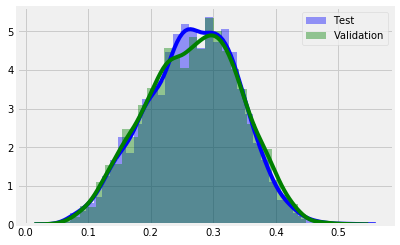

In [82]:
sns.distplot(test_results, color='blue', label='Test')
sns.distplot(y_pred_test_stacked, color='green', label='Validation')
plt.legend(loc='best')
plt.show()

## SHAP

**XGBoost**

In [83]:
import shap

In [84]:
%%time
tree_explainer = shap.TreeExplainer(model=randomForestClassifier)
tree_shap_values = tree_explainer.shap_values(X_test_linear)

Wall time: 22.4 s


**Validation Set (10h-11h)**

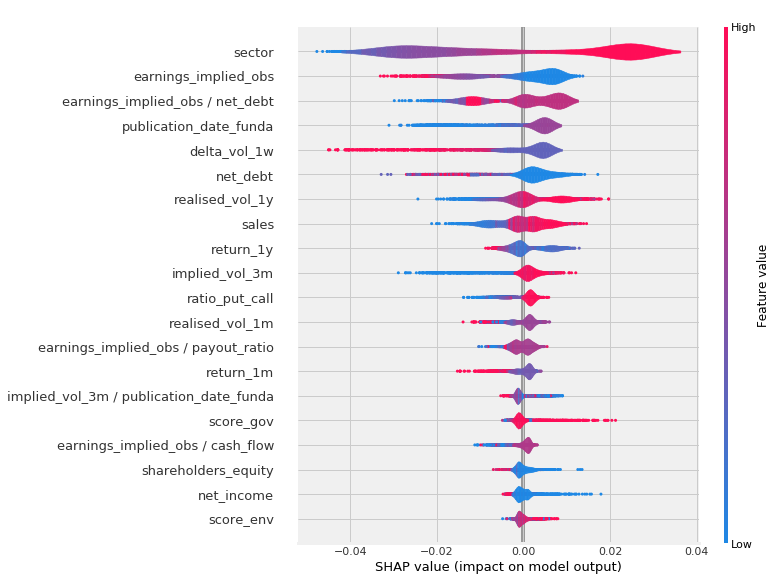

In [86]:
shap.summary_plot(tree_shap_values[1], features=X_test_linear,
                  feature_names=X_test_linear.columns, plot_type='violin',
                  max_display=20)

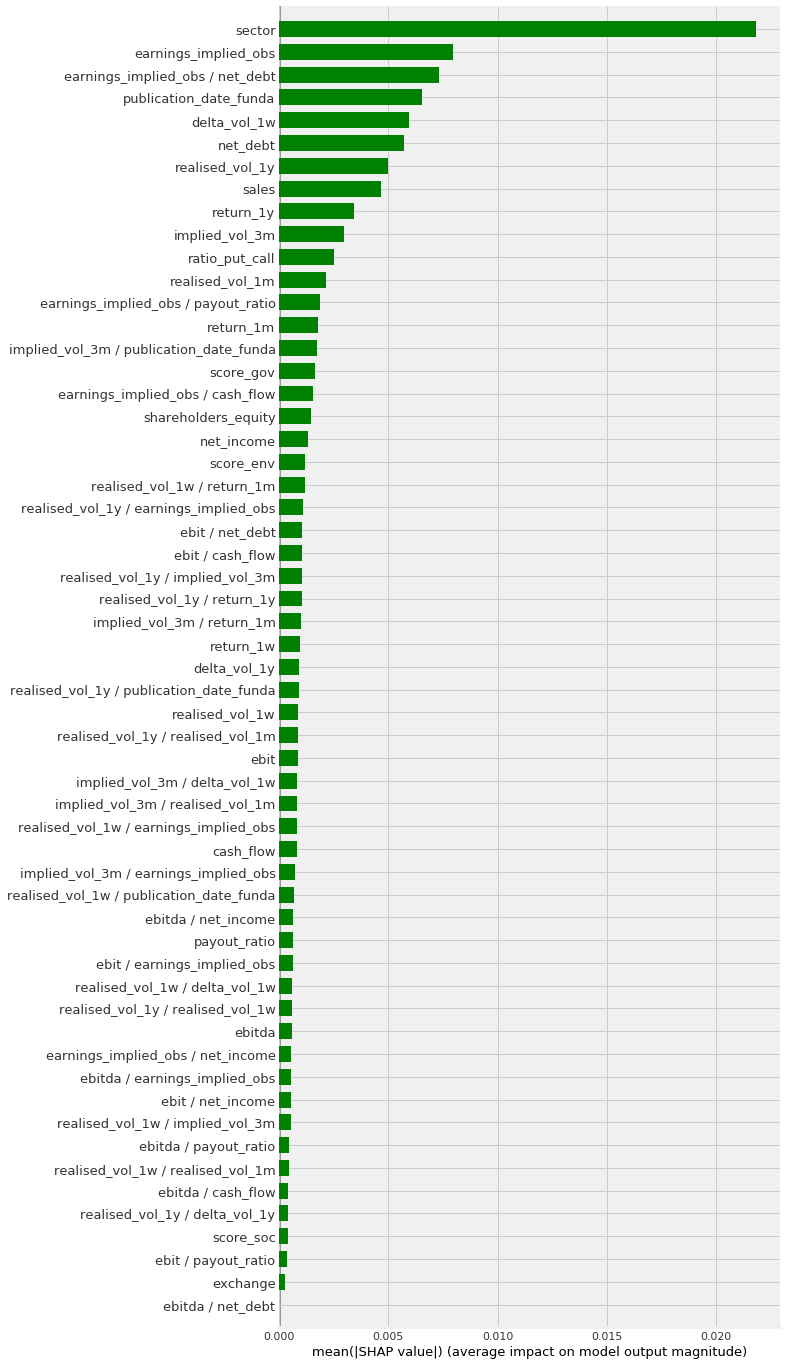

In [87]:
shap.summary_plot(tree_shap_values[1], features=X_test_linear,
                  feature_names=X_test_linear.columns, plot_type='bar',
                  max_display=60, color='green')

**Stacked Learner**

In [88]:
%%time
linear_explainer = shap.LinearExplainer(model=meta_learner, data=x_test)
linear_shap_values = linear_explainer.shap_values(x_test)

Wall time: 601 ms


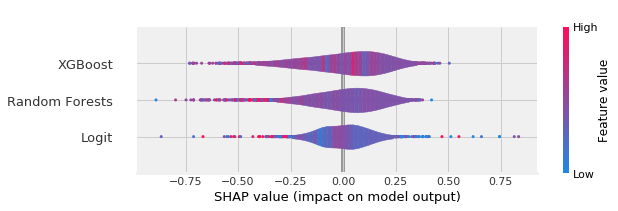

In [89]:
shap.summary_plot(linear_shap_values, features=X_test_linear,
                  feature_names=['Logit', 'Random Forests', 'XGBoost'],
                  plot_type='violin', max_display=20)

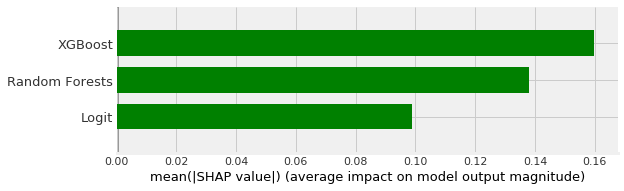

In [90]:
shap.summary_plot(linear_shap_values, features=X_test_linear,
                  feature_names=['Logit', 'Random Forests', 'XGBoost'],
                  plot_type='bar', max_display=20, color='green')

# **Approche bonus pour la recherche des meilleures hyperparamètres: Optimization bayésienne avec Hyperopt**

In [0]:
import hyperopt as hp

def objective(space):

    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    classifier = xgb.XGBClassifier(n_estimators = space['n_estimators'],
                                   max_depth = int(space['max_depth']),
                                   learning_rate = space['learning_rate'],
                                   gamma = space['gamma'],
                                   min_child_weight = space['min_child_weight'],
                                   subsample = space['subsample'],
                                   colsample_bytree = space['colsample_bytree']
                                  )
    
    classifier.fit(X_train_linear, y)

    # Applying k-Fold Cross Validation
    accuracies = cross_val_score(estimator = classifier, X = X_train_linear, y = y, cv = 10)
    CrossValMean = accuracies.mean()

    print("CrossValMean:", CrossValMean)
    print('new best:', space)

    return {'loss': 1-CrossValMean, 'status': STATUS_OK }


In [0]:
space = {
    'max_depth' : hp.choice('max_depth', range(5, 30, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(20, 205, 5)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print("Best: ", best)

    ██████████| 50/50 [27:25<00:00, 32.91s/trial, best loss: 0.26762407263387455] Best: {'colsample_bytree': 0.4, 'gamma': 0.11, 'learning_rate': 0.01, 'max_depth': 20, 'min_child_weight': 9.0, 'n_estimators': 22, 'subsample': 0.45}

In [0]:
from xgboost import XGBClassifier

classifier = XGBClassifier(n_estimators = best['n_estimators'],
                            max_depth = best['max_depth'],
                            learning_rate = best['learning_rate'],
                            gamma = best['gamma'],
                            min_child_weight = best['min_child_weight'],
                            subsample = best['subsample'],
                            colsample_bytree = best['colsample_bytree']
                            )

classifier.fit(X_train_linear, y);